## Import Modules

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
from task2_qlearning_junru_xiong.q_policy import q_policy
%matplotlib inline

In [2]:
from task2_qlearning_junru_xiong.main import PacManJX
from task2_qlearning_junru_xiong.q_policy import q_policy

## Run basic Enviroment

In [3]:
game = PacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.agent.policy = q_policy
game.random_reset()
game.setting.maximum_time = 200
game.generate_animation()
a=HTML(game.animation.to_jshtml())
print('\n',game.process.reward)
print('reward',game.process.current_reward)
a

Generated frames: 15
 -139
reward -99


In [8]:
game = PacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.setting.maximum_time = 300
game.agent.policy = q_policy
game.random_reset()
while not game.process.termination:
        game.run_one_step_without_graph()
        print('reward---',game.process.current_reward)
print('total_reward',game.process.reward)
print('reward',game.process.current_reward)
# game.generate_animation()
# a=HTML(game.animation.to_jshtml())
# a

reward--- -99
total_reward -89
reward -99


## Q Learining Training with 2 random move ghosts

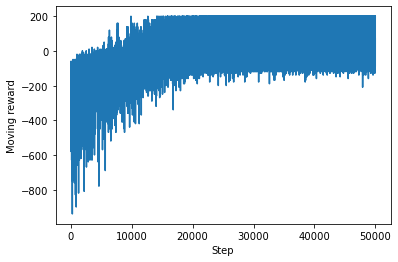

In [6]:
# default parameters: epsilon = 0.05, gamma = 0.99 alpha = 0.01
# the state was defined as: 1 agent absolute position, 2 ghost absolute position, 3 agent 3*3 cells observation
gameee = PacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
gameee.agent.policy = q_policy
gameee.setting.maximum_time = 300
rewards = []
for episode in range(50000):
    gameee.random_reset()
    while not gameee.process.termination:
        s = gameee.state()
        gameee.agent.epsilon_greedy_choose()
        gameee.run_one_step_without_graph()
        a = tuple(gameee.agent.direction_proposal)
        
        sp = gameee.state()
        r = gameee.process.current_reward
        s = tuple(s)
        max_value = max([gameee.agent.Q(sp, a) for a in gameee.agent.actions])
        gameee.agent.Q_values[(s, a)] = gameee.agent.Q(s, a) + gameee.agent.alpha * (r + gameee.agent.gamma * max_value - gameee.agent.Q(s, a))
        # print(gameee.agent.observe(s=s, a=a, sp=sp, r=r))
    rewards.append(gameee.process.reward)
plt.plot(rewards)

plt.show()
#print(game.process.reward)
# game.graphic.frame_figure

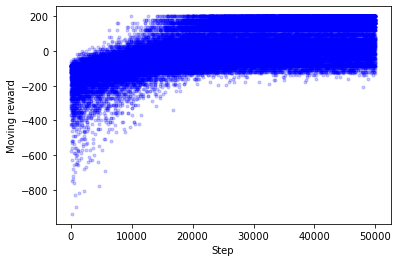

In [11]:
plt.plot(rewards, 'b.', alpha=0.2)
plt.ylabel('Moving reward')
plt.xlabel('Step')
plt.show()

In [7]:
# gameee = PacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=4, maze_column_width=4)
# gameee.agent.policy = q_policy
# gameee.setting.maximum_time = 200
# rewards = []
# for episode in range(50):
#     gameee.random_reset()
#     while not gameee.process.termination:
#         s = gameee.state()
#         gameee.agent.epsilon_greedy_choose()
#         gameee.run_one_step_without_graph()
#         a = tuple(gameee.agent.direction_proposal)
        
#         sp = gameee.state()
#         r = gameee.process.current_reward
#         s = str(s)
#         max_value = max([gameee.agent.Q(sp, a) for a in gameee.agent.actions])
#         gameee.agent.Q_values[(s, a)] = gameee.agent.Q(s, a) + gameee.agent.alpha * (r + gameee.agent.gamma * max_value - gameee.agent.Q(s, a))
#         # print(gameee.agent.observe(s=s, a=a, sp=sp, r=r))
#     rewards.append(gameee.process.reward)
# plt.plot(rewards)
# plt.show()
# #print(game.process.reward)
# # game.graphic.frame_figure

## Q Learing Testing

#### Show animation

In [13]:
gameee.random_reset()
gameee.generate_animation()
a=HTML(gameee.animation.to_jshtml())
print('\n',gameee.process.reward)
print('total_reward',gameee.process.win)
a

Generated frames: 57
 200
total_reward True


#### Test win rate

In [10]:
res = 0
for i in range(1000):
    gameee.random_reset()
    while not gameee.process.termination:
        gameee.run_one_step_without_graph()
#     print('total_reward',gameee.process.win)
    if gameee.process.win:
        res+=1
print('The win rate from 1000 sample is: ', res/1000)

The win rate from 1000 sample is:  0.754
